In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dem_df = pd.read_csv('../data/post_dem_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
rep_df = pd.read_csv('../data/post_rep_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])

sa_all_tweets = pd.read_csv('../data/tweet_data/sa_all_tweets_post.csv', index_col=False)


In [4]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [5]:
dem_df[['num_tweets', 'count_negative', 'count_positive', 'sentiment']].head(2)

,num_tweets,count_negative,count_positive,sentiment
0,0,0,0,-1.000000
1,614,141,334,2.628664


In [6]:
print(len(dem_df[dem_df['sentiment'] > 0]) / len(dem_df))
print(len(dem_df[dem_df['sentiment'] > 0]))

0.8044328552803129
617


(array([149.,   0.,   1.,   1.,   8.,  29., 107., 224., 212.,  36.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 10 Patch objects>)

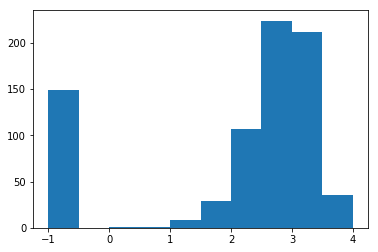

In [7]:
fig, axs = plt.subplots(1)
axs.hist(dem_df['sentiment'])

([array([42., 57., 45., 21.,  8., 11.,  7.,  3.,  3.,  2.]),
  array([358.,  90.,  46.,  21.,   8.,   6.,   4.,   5.,   2.,   0.])],
 array([   0. ,  192.3,  384.6,  576.9,  769.2,  961.5, 1153.8, 1346.1,
        1538.4, 1730.7, 1923. ]),
 <a list of 2 Lists of Patches objects>)

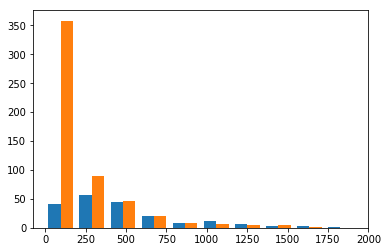

In [16]:
fig, axs = plt.subplots(1)
no = dem_df[(dem_df['count_positive'] < 2000) & (dem_df['won_primary'] == 'No')].count_positive
yes = dem_df[(dem_df['count_positive'] < 2000) & (dem_df['won_primary'] == 'Yes')].count_positive
axs.hist([yes, no])

([array([12.,  0.,  0.,  0.,  1.,  1., 19., 85., 74., 10.]),
  array([129.,   0.,   1.,   1.,   6.,  27.,  88., 133., 134.,  24.])],
 array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]),
 <a list of 2 Lists of Patches objects>)

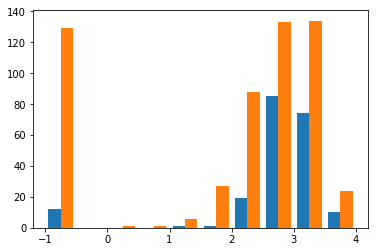

In [17]:
fig, axs = plt.subplots(1)
no = dem_df[(dem_df['sentiment'] < 2000) & (dem_df['won_primary'] == 'No')].sentiment
yes = dem_df[(dem_df['sentiment'] < 2000) & (dem_df['won_primary'] == 'Yes')].sentiment
axs.hist([yes, no])

In [15]:
axs.hist(dem_df[(dem_df['count_positive'] < 2000) & (dem_df['won_primary'] == 'Yes')].count_positive)# dem_df.won_primary.unique()

(array([42., 57., 45., 21.,  8., 11.,  7.,  3.,  3.,  2.]),
 array([   0. ,  192.3,  384.6,  576.9,  769.2,  961.5, 1153.8, 1346.1,
        1538.4, 1730.7, 1923. ]),
 <a list of 10 Patch objects>)

(array([515., 127.,  46.,  30.,  15.,  12.,   6.,   2.,   3.,   1.]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

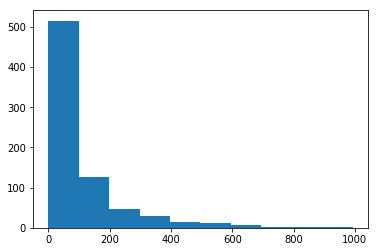

In [36]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_negative'] < 1000].count_negative)

(array([544., 125.,  49.,  16.,  11.,   4.,   7.,   2.,   1.,   4.]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

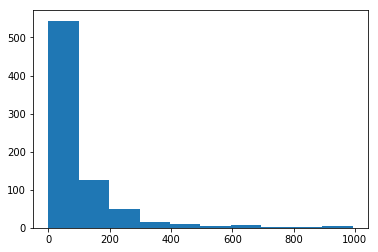

In [38]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_neutral'] < 1000].count_neutral)